In [3]:
import pickle

FUND_HISTORY_SUMMARIES_PATH = "../data/fund_history_summaries.dat"

with open(FUND_HISTORY_SUMMARIES_PATH, "rb") as f:
    fund_history_summary = pickle.load(f)

fund_history_summary.validation_score

0.39114391143911437

## Payout per odds

In [4]:
from math import floor
import seaborn as sns

bets = []
for betting_slip in fund_history_summary.betting_slips.values():
    bets += betting_slip.bets

payout_win_prob_bins = {}
for bet in bets:
    bin_key = str(floor(bet.success_probability * 10))
    payout = bet.win - bet.loss
    if bin_key not in payout_win_prob_bins:
        payout_win_prob_bins[bin_key] = [payout]
    else:
        payout_win_prob_bins[bin_key].append(payout)

for bin in payout_win_prob_bins:
    print(f"bin {bin}: {len(payout_win_prob_bins[bin])}")
    payout_win_prob_bins[bin] = sum(payout_win_prob_bins[bin]) / len(payout_win_prob_bins[bin])
print(payout_win_prob_bins)

bin 3: 384
bin 5: 339
bin 6: 133
bin 4: 305
bin 1: 46
bin 7: 50
bin 2: 78
bin 0: 19
bin 8: 1
{'3': -0.0011116256684662728, '5': -0.01070434419099671, '6': -0.0014092897310735257, '4': -0.004823834535593801, '1': -0.0014716007789747738, '7': -0.012729421306157689, '2': -0.002647056738363275, '0': -0.0016099926334260238, '8': 0.0015912443262597886}


## Payout per number of horses

In [5]:
import seaborn as sns

betting_slips = fund_history_summary.betting_slips
payout_per_number_of_horses = {}
for betting_slip_date in betting_slips:
    betting_slip = betting_slips[betting_slip_date]
    if betting_slip.n_runners not in payout_per_number_of_horses:
        payout_per_number_of_horses[betting_slip.n_runners] = betting_slip.payout
    else:
        payout_per_number_of_horses[betting_slip.n_runners] += betting_slip.payout

ax = sns.barplot(list(payout_per_number_of_horses.keys()), list(payout_per_number_of_horses.values()))
ax.set(xlabel='Number of horses', ylabel='Total Payout')

AttributeError: 'BettingSlip' object has no attribute 'n_runners'

## Best paying tracks

/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Total Payout'), Text(0.5, 0, 'Track')]

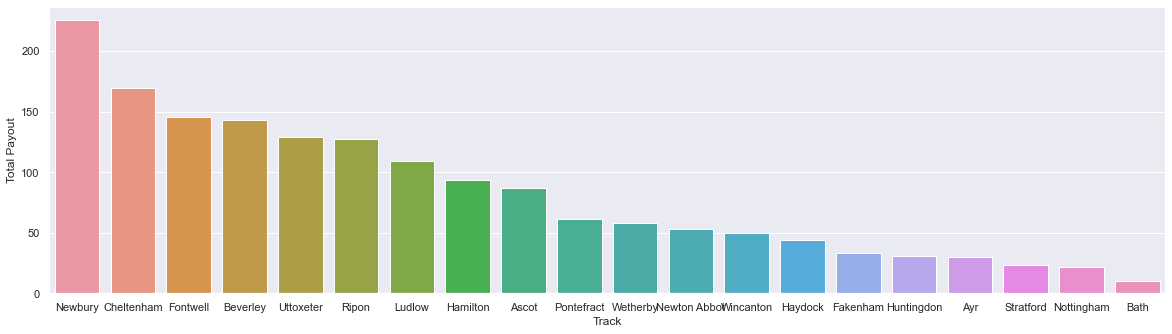

In [3]:
betting_slips = fund_history_summary.betting_slips
payout_per_track = {}
for betting_slip_date in betting_slips:
    betting_slip = betting_slips[betting_slip_date]
    if betting_slip.track not in payout_per_track:
        payout_per_track[betting_slip.track] = betting_slip.payout
    else:
        payout_per_track[betting_slip.track] += betting_slip.payout

payout_per_track = dict(sorted(payout_per_track.items(), key=lambda item: item[1], reverse=True))

sns.set(rc={'figure.figsize':(20,5.27)})
ax = sns.barplot(list(payout_per_track.keys())[:20], list(payout_per_track.values())[:20])
ax.set(xlabel='Track', ylabel='Total Payout')

## Worst paying tracks

/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Total Payout'), Text(0.5, 0, 'Track')]

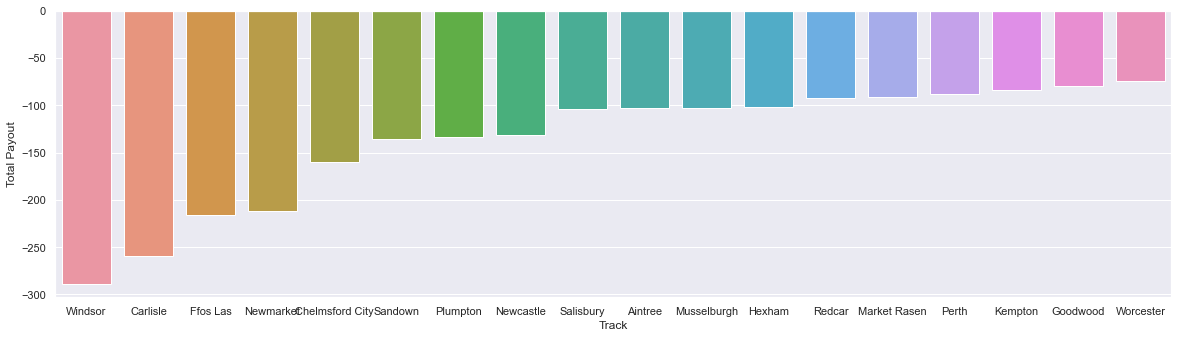

In [4]:
payout_per_track = dict(sorted(payout_per_track.items(), key=lambda item: item[1]))
ax = sns.barplot(list(payout_per_track.keys())[:18], list(payout_per_track.values())[:18])
ax.set(xlabel='Track', ylabel='Total Payout')